# Harris Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Type <class 'numpy.ndarray'>  size: (1271, 1920, 3)


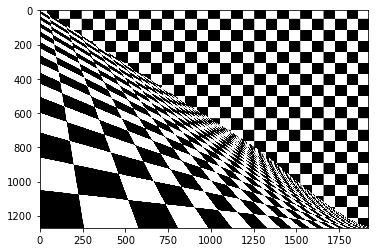

In [2]:
image = cv2.cvtColor(cv2.imread("chess.jpg"), cv2.COLOR_BGR2RGB)
print("Type", type(image), " size:", image.shape)

plt.imshow(image)

### Detect corners

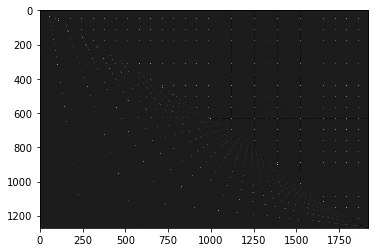

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Convert to float
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap="gray")

It is not filtering very well, we will try to transform to HSV and apply a different filter

### Select and display strong corners

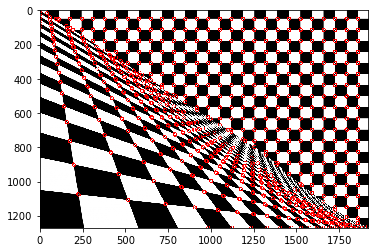

In [10]:
# Define a threshold for extracting strong corners
thresh = 0.1*dst.max()

corner_image = np.copy(image)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if dst[j, i] > thresh:
            cv2.circle(corner_image, (i, j), 10, (255, 0, 0), 1)
            
plt.imshow(corner_image)